In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_38092\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[2043]

Unnamed: 0                         2043.000000
EPIC ID                       202068486.000000
Teff                               3363.763200
logg                                  4.474600
Flare #                               3.000000
Observation time                     36.266181
Average flare duration                0.224748
Longest flare duration                0.469928
Shortest flare duration               0.102158
Average percentage increase          81.164002
Highest percentage increase         233.356214
Lowest percentage increase            2.833498
Name: 2043, dtype: float64

In [4]:
flc = from_mast("202068486", mode="LC", mission="K2")

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

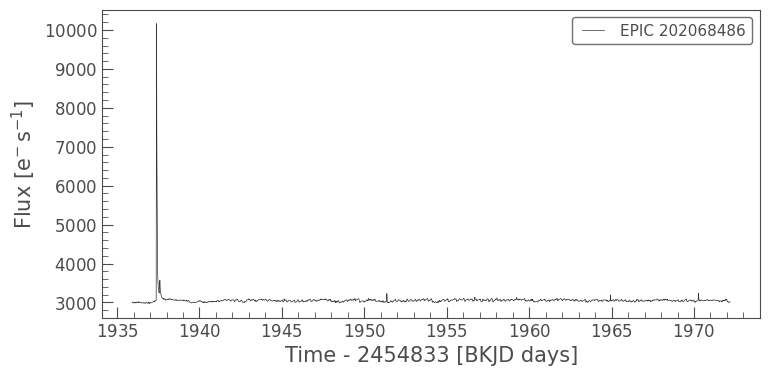

In [5]:
flc.plot()

In [6]:
flc = flc.detrend("savgol")

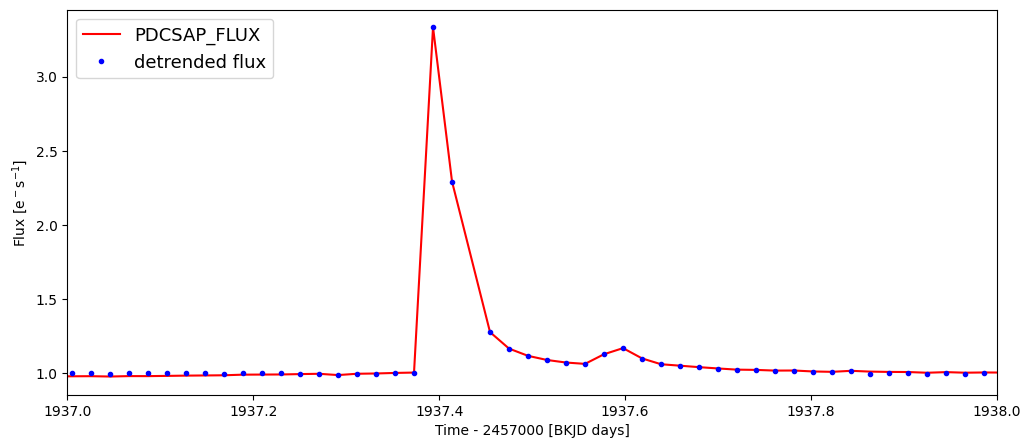

In [11]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
plt.xlim(1937, 1938)
#plt.ylim(.95,1.25)
plt.legend(loc=2,fontsize=13);

In [10]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,70,92,89483,89506,1937.393401,1937.863329,11289.250735918802,6.383185113809736,2.333562135696411,0.469928,1640.000000
1,706,710,90165,90170,1951.327770,1951.429928,188.95159737013293,3.5584381591314522,0.07302296161651611,0.102158,1640.000000
2,944,949,90427,90432,1956.680855,1956.783013,126.45550398725062,4.772526388991466,0.028334975242614746,0.102158,1640.000000


In [9]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 3 candidate(s) in the (0,1640) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
